In [4]:
import ete3
import os
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import subprocess
from scipy.stats import spearmanr, linregress
import itertools
from Bio import SeqIO, SearchIO, AlignIO, Align, Alphabet
import re
import multiprocessing
from copy import deepcopy
import random

class cd:
    """
    Context manager for changing the current working directory
    """
    def __init__(self, newPath):
        self.newPath = os.path.expanduser(newPath)

    def __enter__(self):
        self.savedPath = os.getcwd()
        os.chdir(self.newPath)

    def __exit__(self, etype, value, traceback):
        os.chdir(self.savedPath)

In [46]:
os.chdir('/work/site_rate/sequence_simulation/hug/')

#no_fast: 1,2,3,4,5,6,7,8,9,10
#no slow: 4,5,6,7,8,9,10,11,12

alignment           = AlignIO.read('1.fas', 'fasta')
rates               = pd.read_table('1.rate', comment='#')
full_sequences      = {}
assessed_categories = [4,5,6,7,8,9,10,11,12]

random.seed(12345)
indexes = random.sample(range(3759), 2936)
selected_categories = rates[rates.Cat.isin(assessed_categories)]
out = open('categories_combinations/no_slow_evolving_sites.aln', 'wb')
for sequence in alignment:
    sites = np.asanyarray([sequence[position] for position in selected_categories.index])
    out.write('>{header}\n{sequence}\n'.format(
        header=sequence.name,
        sequence=''.join(sites[indexes])
    ))
out.close()

In [44]:
len([sequence[position] for position in selected_categories.index])

4177

In [47]:
os.chdir('/work/site_rate/sequence_simulation/hug/categories_combinations/')
tree = ete3.Tree('../reference.tre')
tree.unroot()
tree.write(outfile='reference.tre', format=9)

In [48]:
random.seed(12345)

os.system('iqtree -rf reference.tre -t no_slow_evolving_sites.aln.ufboot')
os.system('iqtree -rf reference.tre -t no_fast_evolving_sites.aln.ufboot')
os.system('iqtree -rf reference.tre -t just_mid_evolving_sites.aln.ufboot')

0

Text(0,0.5,'Kernel density')

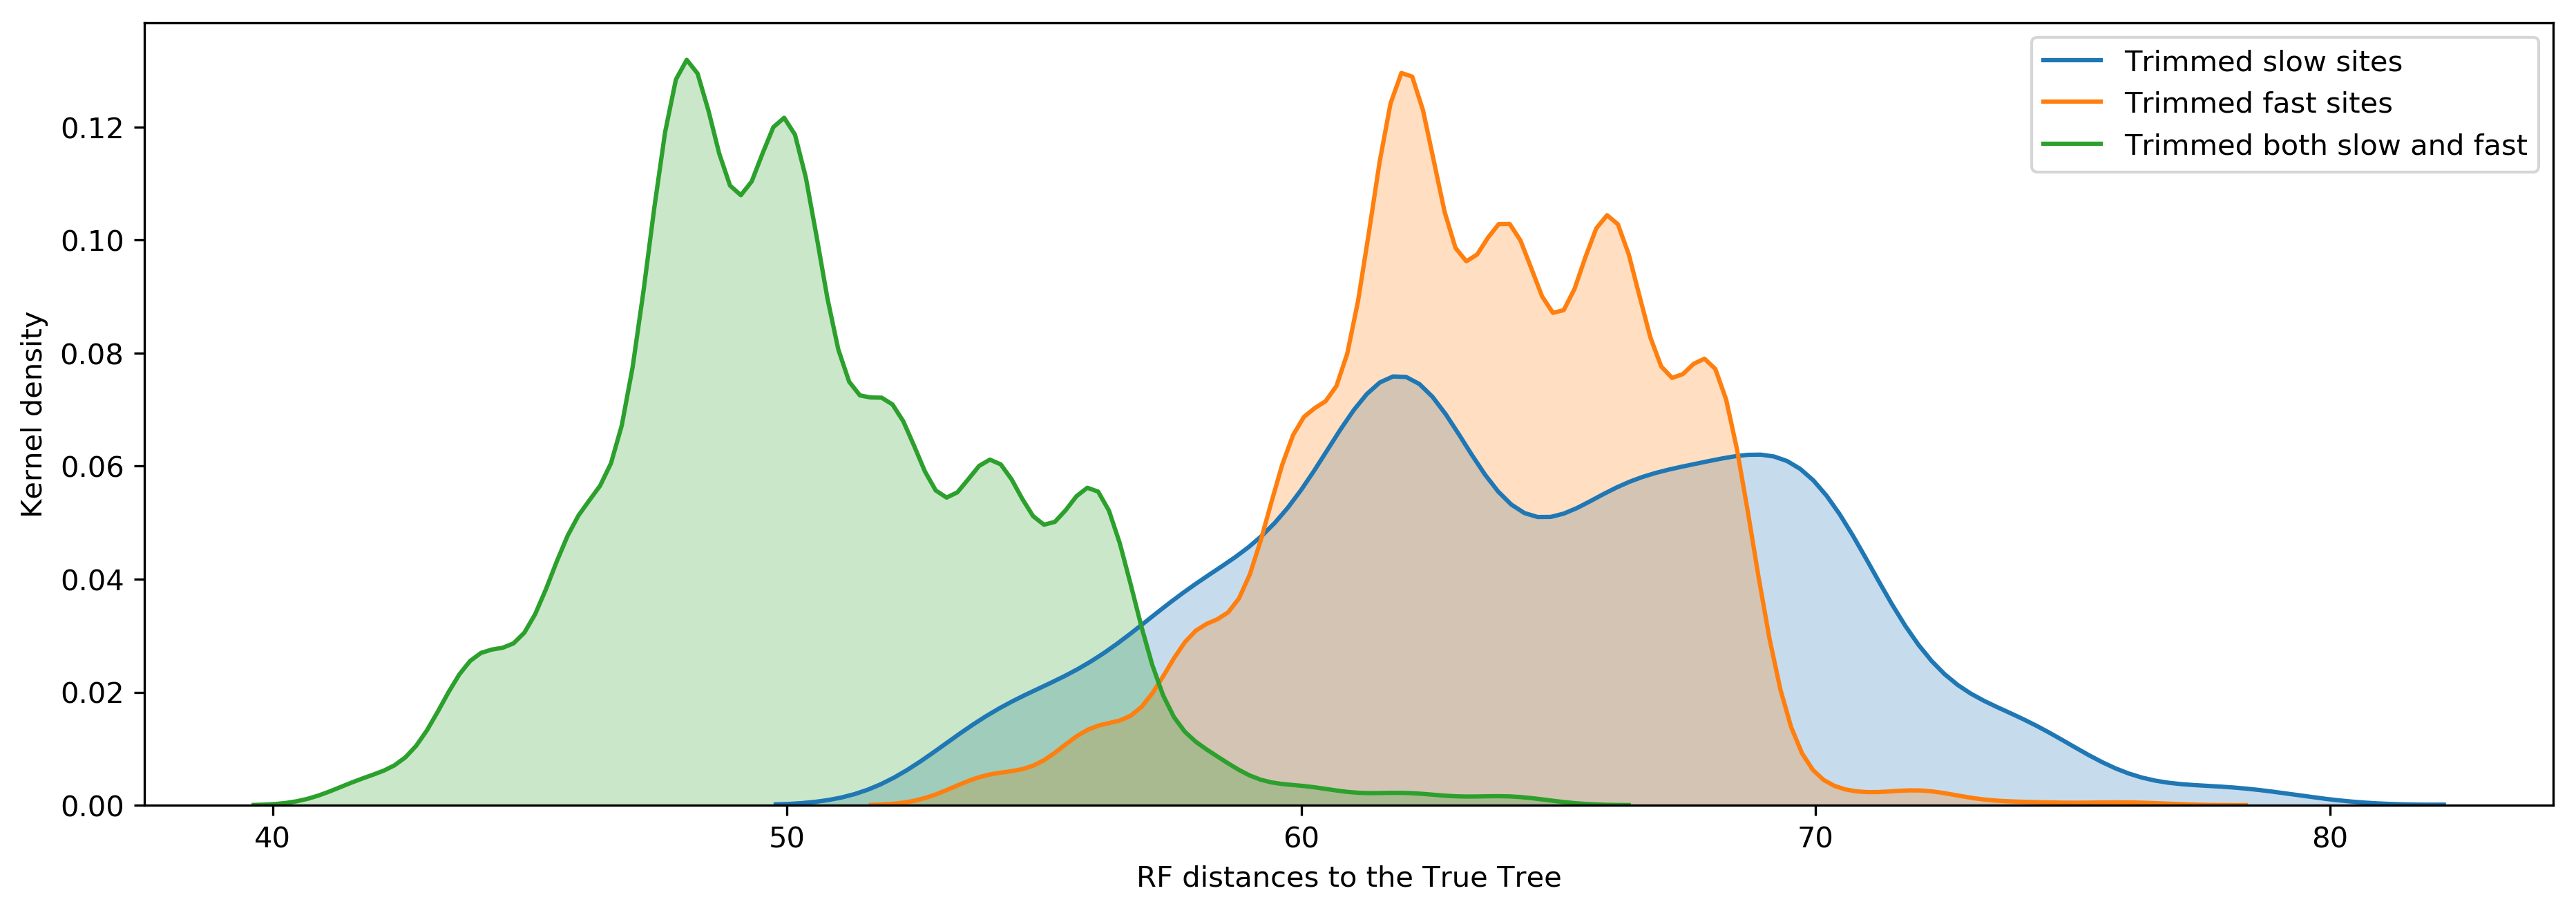

In [50]:
fig, ax = plt.subplots(figsize=(15,5), dpi=300)
sns.kdeplot(
    [int(line.split()[1]) for line in open('no_slow_evolving_sites.aln.ufboot.rfdist').readlines()[1:]],
    shade=True,
    label='Trimmed slow sites',
    ax=ax
)
sns.kdeplot(
    [int(line.split()[1]) for line in open('no_fast_evolving_sites.aln.ufboot.rfdist').readlines()[1:]],
    shade=True,
    label='Trimmed fast sites',
    ax=ax
)
sns.kdeplot(
    [int(line.split()[1]) for line in open('just_mid_evolving_sites.aln.ufboot.rfdist').readlines()[1:]],
    shade=True,
    label='Trimmed both slow and fast',
    ax=ax
)
ax.set_xlabel('RF distances to the True Tree')
ax.set_ylabel('Kernel density')

In [30]:
from scipy.stats import ttest_ind
ttest_ind(
    [int(line.split()[1]) for line in open('no_slow_evolving_sites.aln.ufboot.rfdist').readlines()[1:]],
    [int(line.split()[1]) for line in open('no_fast_evolving_sites.aln.ufboot.rfdist').readlines()[1:]]
)

Ttest_indResult(statistic=0.48171702044993076, pvalue=0.6300597407198631)

In [34]:
from scipy.stats import ttest_ind
ttest_ind(
    [int(line.split()[1]) for line in open('just_mid_evolving_sites.aln.ufboot.rfdist').readlines()[1:]],
    [int(line.split()[1]) for line in open('no_fast_evolving_sites.aln.ufboot.rfdist').readlines()[1:]]
)

Ttest_indResult(statistic=-26.34079879403357, pvalue=1.6650583719466463e-131)

In [23]:
os.chdir('/work/site_rate/sequence_simulation/hug/')

alignment           = AlignIO.read('1.fas', 'fasta')
rates               = pd.read_table('1.rate', comment='#')
full_sequences      = {}
assessed_categories = [4,5,6,7,8,9,10]

selected_categories = rates[rates.Cat.isin(assessed_categories)]
out = open('categories_combinations/normalized_length/just_mid_evolving_sites.aln', 'wb')
for sequence in alignment:
    out.write('>{header}\n{sequence}\n'.format(
        header=sequence.name,
        sequence=''.join([sequence[position] for position in selected_categories.index])
    ))
out.close()